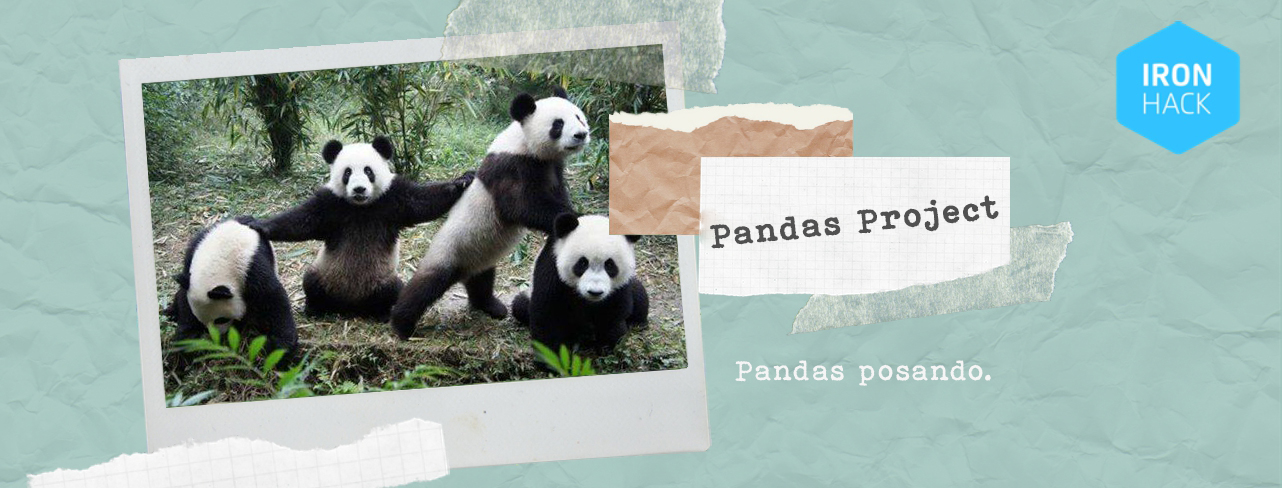

In [37]:
import pandas as pd
import src.limpieza_texto as lt
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("data/Shark_clean.csv", encoding = "ISO-8859-1", index_col = 0)

In [42]:
data.describe()

,Year,Decade
count,6272.000000,6272.000000
mean,1966.882015,1962.388393
std,48.361603,48.378296
min,1543.000000,1540.000000
25%,1944.000000,1940.000000
50%,1978.000000,1970.000000
75%,2005.000000,2000.000000
max,2018.000000,2010.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     6302 non-null   object 
 1   Year     6272 non-null   float64
 2   Type     6298 non-null   object 
 3   Fatal    5761 non-null   object 
 4   Species  6302 non-null   object 
 5   Dayweek  6228 non-null   object 
 6   Decade   6272 non-null   float64
dtypes: float64(2), object(5)
memory usage: 393.9+ KB


In [103]:
data.head()

,Date,Year,Type,Fatal,Species,Dayweek,Decade
0,25/06/2018,2018.0,Boating,N,White Shark,Monday,2010.0
1,18/06/2018,2018.0,Unprovoked,N,Regular Shark,Monday,2010.0
2,09/06/2018,2018.0,Invalid,N,Regular Shark,Saturday,2010.0
3,08/06/2018,2018.0,Unprovoked,N,Regular Shark,Friday,2010.0
4,04/06/2018,2018.0,Provoked,N,Tiger Shark,Monday,2010.0


In [8]:
years_of_attack = data['Year'] > '1880'

In [131]:
media_ataques_anuales = data.Year.value_counts().mean()
media_ataques_anuales

25.188755020080322

In [142]:
ataques_anuales = data[years_of_attack].Year.value_counts()
ataques_anuales

<ipython-input-142-81fe5d1f3a3a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ataques_anuales = data[years_of_attack].Year.value_counts()


2015.0    143
2017.0    136
2016.0    131
2011.0    129
2014.0    128
         ... 
1891.0      9
1885.0      9
1881.0      9
1884.0      7
1918.0      5
Name: Year, Length: 138, dtype: int64

In [121]:
data.Year.min()

1543.0

<ipython-input-119-d53aa353f964>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anuales = sns.histplot(data[years_of_attack].Year[::-1])   #legend(data[years_of_attack].Year.decade)


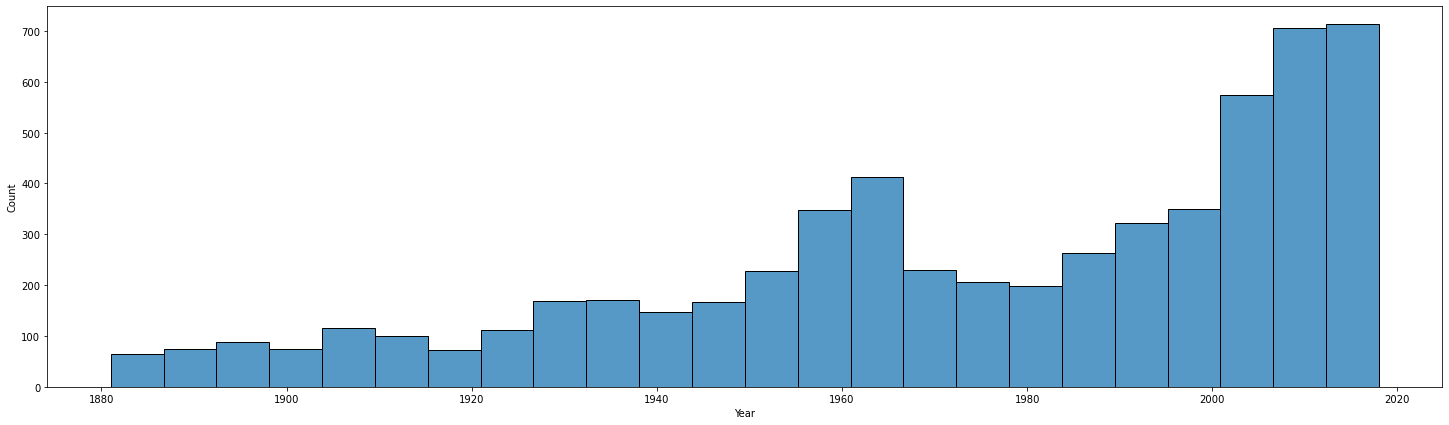

In [119]:
fig, axs = plt.subplots(1, figsize=(25, 7))
anuales = sns.histplot(data[years_of_attack].Year[::-1])   #legend(data[years_of_attack].Year.decade)

<ipython-input-143-4798c35c1b21>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anuales = sns.histplot(x = data[years_of_attack].Year, data = ataques_anuales)   #legend(data[years_of_attack].Year.decade)


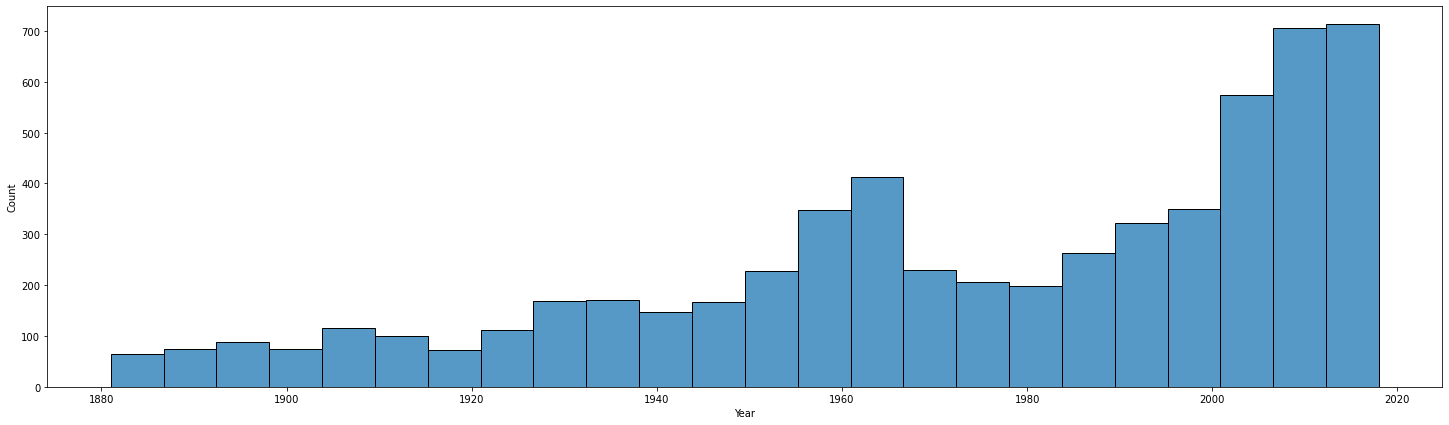

In [143]:
fig, axs = plt.subplots(1, figsize=(25, 7))
anuales = sns.histplot(x = data[years_of_attack].Year, data = ataques_anuales)   #legend(data[years_of_attack].Year.decade)

<AxesSubplot:xlabel='Year', ylabel='Density'>

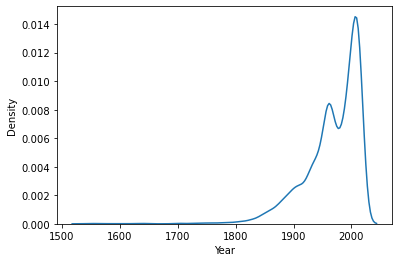

In [74]:
sns.kdeplot(data.Year[::-1], cumulative = False)

<ipython-input-160-cc71705072d8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  evolucion = sns.countplot(y = data[years_of_attack].Decade)


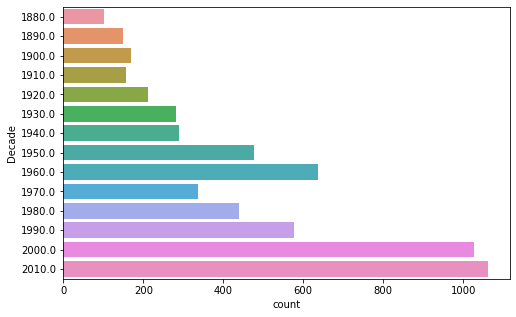

In [160]:
fig, axs = plt.subplots(1, figsize=(8, 5))
evolucion = sns.countplot(y = data[years_of_attack].Decade)

In [161]:
evolucion.figure.savefig("Evolucion.jpg", dpi=1000)

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


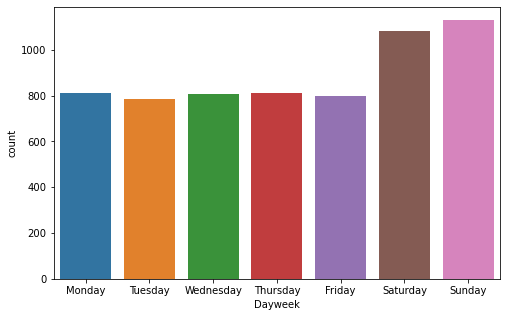

In [158]:
fig, axs = plt.subplots(1, figsize=(8, 5))
dias_semana = sns.countplot(data.Dayweek, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [159]:
dias_semana.figure.savefig("dias_semana.jpg", dpi=1000)

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dayweek', ylabel='count'>

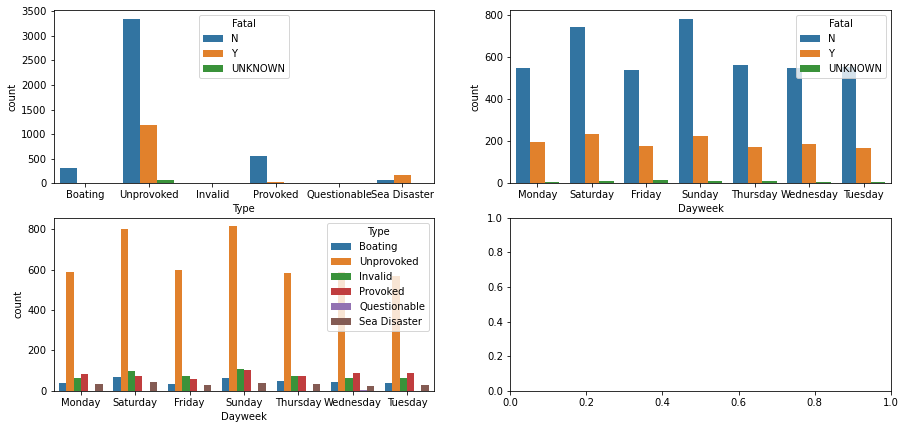

In [162]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
sns.countplot(x = data.Type, hue = data.Fatal, ax = axs[0, 0])
sns.countplot(data.Dayweek, hue = data.Fatal, ax = axs[0, 1])
sns.countplot(data.Dayweek, hue = data.Type, ax = axs[1, 0])

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


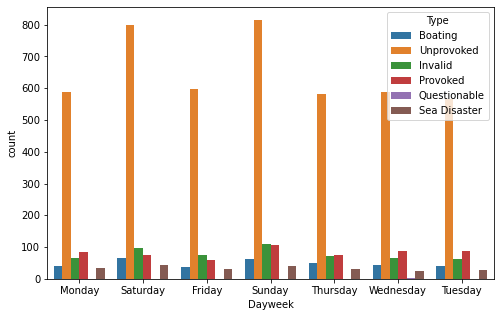

In [165]:
fig, axs = plt.subplots(1, figsize=(8, 5))
semana = sns.countplot(data.Dayweek, hue = data.Type)

In [166]:
semana.figure.savefig("Semana.jpg", dpi=1000)

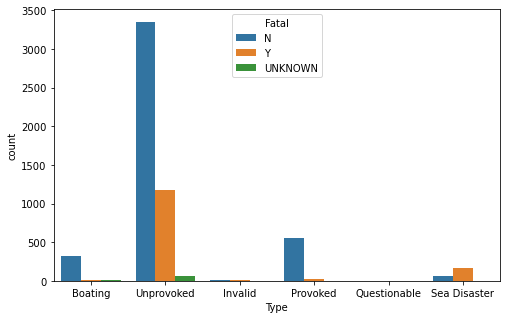

In [156]:
fig, axs = plt.subplots(1, figsize=(8, 5))
mortalidad = sns.countplot(x = data.Type, hue = data.Fatal)

In [157]:
mortalidad.figure.savefig("mortalidad.jpg", dpi=1000)